In [4]:
import platform
import sys
import importlib

if platform.system() == 'Darwin':
    base_FP = '/Users/hyunglokkim/Insync/hkim@geol.sc.edu/Google_Drive/'
else:
    base_FP = '/data'
sys.path.append(base_FP + '/python_modules')

import hydroAI.Plot as Plot
import hydroAI.LULC as LULC
import matplotlib.pyplot as plt

importlib.reload(LULC)
importlib.reload(Plot)

import warnings
warnings.filterwarnings("ignore")

In [5]:
# How to Download LULC data
# 1) Copernicus LULC
# Google Earth Engine
# https://code.earthengine.google.com
# Editor:
# //Define the Korean Peninsula's boundary
# var koreaBoundary = ee.Geometry.Rectangle([124, 33, 131, 43]);
# // Load the dataset and select the 'discrete_classification' band
# var dataset = ee.Image('COPERNICUS/Landcover/100m/Proba-V-C3/Global/2019').select('discrete_classification');
# // Clip the dataset to the Korean Peninsula
# var koreaLandCover = dataset.clip(koreaBoundary);
#
# // Add the clipped image layer to the Map
# Map.centerObject(koreaBoundary, 6); // Center the map over the Korean Peninsula
# Map.addLayer(koreaLandCover, {}, 'Korea Land Cover');
# 
#Export.image.toDrive({
#  image: koreaLandCover,
#  description: 'KoreaLandCover2019',
#  scale: 500,
#  region: koreaBoundary,
#  fileFormat: 'GeoTIFF'
#});

In [6]:
# Example of how to call the function
FP = '/Users/hyunglokkim/cpuserver_data/LULC/copernicus'
input_file = 'KoreaLandCover2019.tif'
dst_crs = 'EPSG:4326' #https://epsg.io/4326 => lat/lon projection
resolution = 0.01 #for EPSG:4326, 0.03 is around 3-km x 3-km size pixel
rds, lon, lat = LULC.copernicus(FP, input_file, dst_crs, resolution)

CRS of the input file: EPSG:3857


In [30]:
# To print the docstring
print(LULC.copernicus.__doc__)


    Reproject and resample the input raster data, then apply the majority filter to the data.
    Args:
    - FP: File path to the input raster.
    - input_file: Name of the input raster file.
    - dst_crs: The target coordinate reference system.
    - resolution: The target resolution for resampling.
    - output_FP: File path where the output file will be saved. If None, the output file is created temporarily and removed.
    
    Returns:
    - rds: Reprojected and resampled data.
    - lon: Longitude values of pixel centers.
    - lat: Latitude values of pixel centers.
    



    Plot the LULC map from Copernicus data.
    
    Args:
    - longitude: Array of longitude values.
    - latitude: Array of latitude values.
    - rds: Raster dataset containing LULC data.
    - title: Title of the plot.
    - region (optional): If provided, should be a list or tuple in the format [lon_min, lon_max, lat_min, lat_max] 
                         specifying the bounding coordinates for the plot. If not provided, the function will use 
                         the full range of longitude and latitude values from the provided arrays.

    This function plots the land use and land cover (LULC) data, mapping the LULC codes to their respective colors 
    and displaying the result on a map. The map can be focused on a specific region if the 'region' parameter is provided.
    


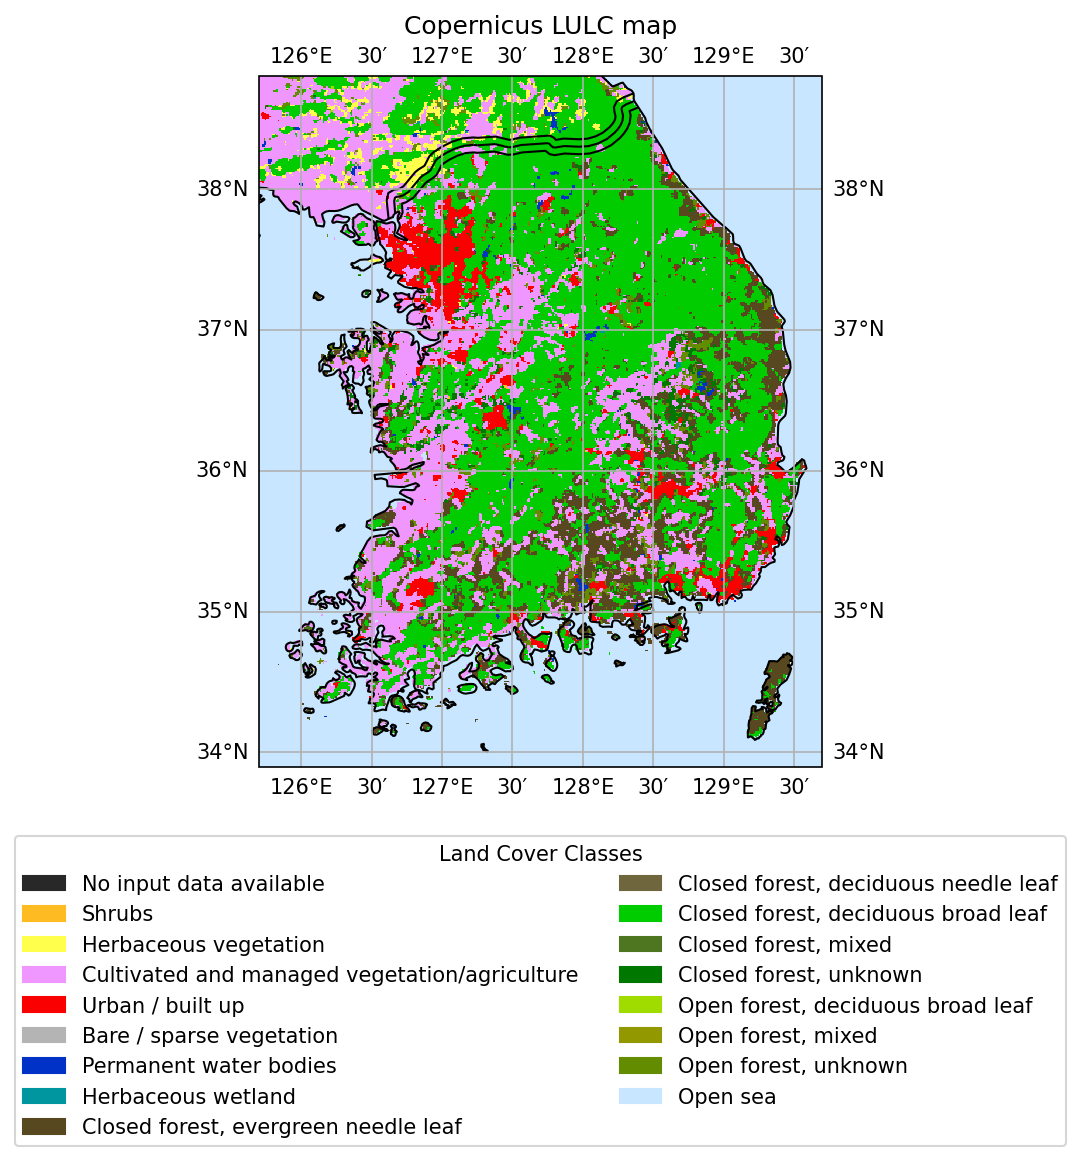

In [31]:
print(Plot.plot_LULC_map_copernicus.__doc__)
# Example of how to make a LULC map
bound = [125.7, 129.7, 33.9, 38.8] # entire Korea
#bound = [126.73, 126.95, 35.17, 35.37] # Gwangju
 
Plot.plot_LULC_map_copernicus(lon, lat, rds, 'Copernicus LULC map', region=bound)